# Q1

Consider the probability distribution below:

$$P(x) = e^{0.4(x-0.4)^2 - 0.08 x^4}$$


## (a)
Write a function to implement Metropolice algorithm to generate random samples that have the same PDF as the given formula.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [2]:
def P(x):
    return np.exp(0.4 * (x - 0.4) ** 2 - 0.08 * x ** 4)

In [27]:
def Metropolice(n, pdf, sigma):
    present = np.random.normal(0, sigma)
    #present = np.random.uniform(-4, 4)
    sample = [present]
    count = 1
    while count < n:
        possible_next = np.random.normal(present, sigma)
        #possible_next = np.random.uniform(-4, 4)
        alpha = pdf(possible_next) / pdf(present)
        if np.random.uniform() <= alpha:
            sample.append(possible_next)
            present = possible_next
            count += 1
    return np.array(sample)

## (b)
Plot the function alongside with the histogram of the generated sample. Do they match? If not, what shall be done here?

In [47]:
n = 100000
bins = 100
smp1 = Metropolice(n, P, 1)

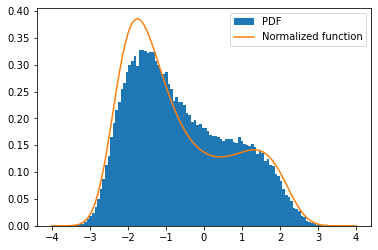

In [48]:
plt.hist(smp1, bins, density = True, label = 'PDF')
X = np.linspace(-4, 4, bins)
vector_P = np.vectorize(P)
Y = vector_P(X)
Y = Y / np.sum(Y) * bins / 8
plt.plot(X, Y, label = 'Normalized function')
plt.legend()
plt.show()

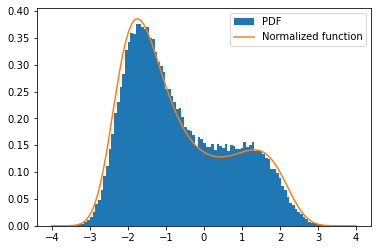

In [49]:
n = 100000
bins = 100
smp1 = Metropolice(n, P, 1 / 2)

plt.hist(smp1, bins, density = True, label = 'PDF')
X = np.linspace(-4, 4, bins)
vector_P = np.vectorize(P)
Y = vector_P(X)
Y = Y / np.sum(Y) * bins / 8
plt.plot(X, Y, label = 'Normalized function')
plt.legend()
plt.show()

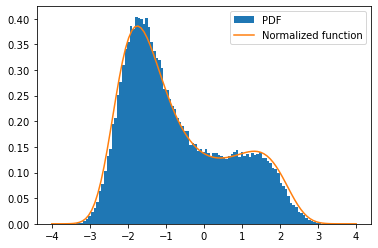

In [52]:
n = 100000
bins = 100
smp1 = Metropolice(n, P, 1 / 4)

plt.hist(smp1, bins, density = True, label = 'PDF')
X = np.linspace(-4, 4, bins)
vector_P = np.vectorize(P)
Y = vector_P(X)
Y = Y / np.sum(Y) * bins / 8
plt.plot(X, Y, label = 'Normalized function')
plt.legend()
plt.show()

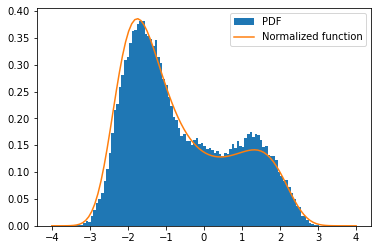

In [51]:
n = 100000
bins = 100
smp1 = Metropolice(n, P, 1 / 10)

plt.hist(smp1, bins, density = True, label = 'PDF')
X = np.linspace(-4, 4, bins)
vector_P = np.vectorize(P)
Y = vector_P(X)
Y = Y / np.sum(Y) * bins / 8
plt.plot(X, Y, label = 'Normalized function')
plt.legend()
plt.show()

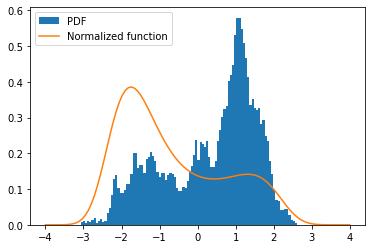

In [55]:
n = 100000
bins = 100
smp1 = Metropolice(n, P, 1 / 50)

plt.hist(smp1, bins, density = True, label = 'PDF')
X = np.linspace(-4, 4, bins)
vector_P = np.vectorize(P)
Y = vector_P(X)
Y = Y / np.sum(Y) * bins / 8
plt.plot(X, Y, label = 'Normalized function')
plt.legend()
plt.show()

appearently setting $\sigma = 1 / 4$ is a good choice.

## (c)
Generate data using Metropolice algorithm with four different values for step size (0.1, 0.5, 1 and 2) and plot the autocorrelation function for each case. which one becomes uncorrelated sooner?

In [56]:
from statsmodels.graphics.tsaplots import plot_acf

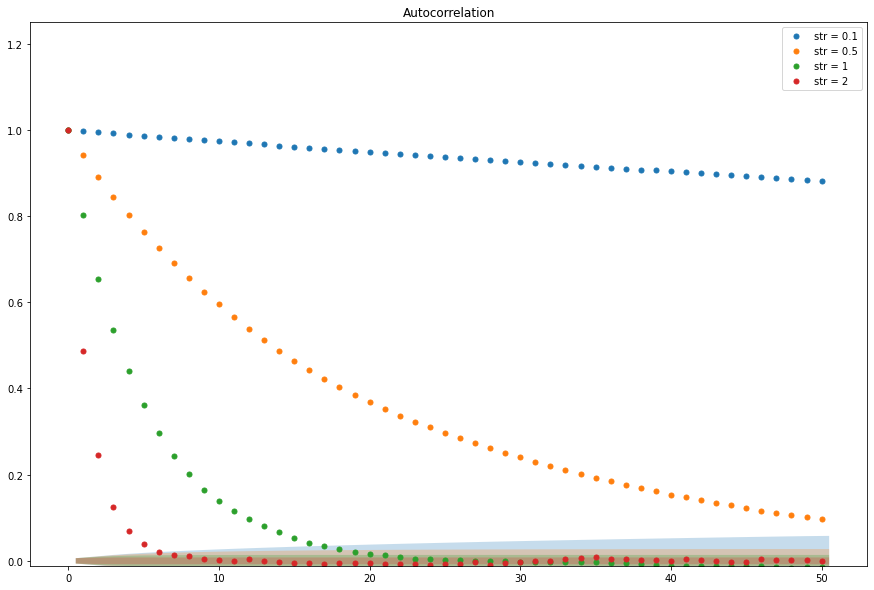

In [77]:
plt.figure(figsize=(15, 10))
n = 100000
bins = 100
for step in [0.1, 0.5, 1, 2]:
    smp = Metropolice(n, P, step)
    plot_acf(np.array(smp), ax = plt.subplot(1, 1, 1), use_vlines = False, auto_ylims = True, label = 'str = ' + str(step))

plt.legend()

# Q2: Variational Monte Carlo

Imagine we have a quantum harmonic osscilator were the Hamiltonian is
$$\hat{H} = -\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}x^2 $$

In oreder to solve this, we guess a wave function, and then using Monte Carlo methods, we try to find the lowest energy state.

Now imagine our wave function is

$$ \psi \propto e^{-\lambda x^2} $$

Then the local energy of the system at each point would be

$$ E_L = \frac{H \psi}{\psi} = \lambda + x^2 (\frac{1}{2} - 2\lambda^2) $$

## (a)

Write a Metropolice algorithm to generate values for $x$ as a function of $\lambda$. Then plot the PDF alongside with the analitycal function for $P(x) = \psi^2(x)$ to confirm that they match.

P.S. in quantum mechanics, the probability function is always given as $\psi^2$.

In [36]:
def P(x, la):
    return np.exp(-2 * la * x**2)

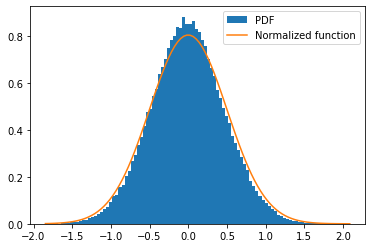

In [41]:
n = 100000
bins = 100
P_la = lambda x : P(x, la = 1)
smp = Metropolice(n, P_la, 1 / 5)
plt.hist(smp, bins, density = True, label = 'PDF')
m = np.min(smp)
M = np.max(smp)
X = np.linspace(m, M, bins)
vector_P_la = np.vectorize(P_la)
Y = vector_P_la(X)
Y = Y / np.sum(Y) * bins / (M - m)
plt.plot(X, Y, label = 'Normalized function')
plt.legend()
plt.show()

## (b)

Write two functions to calculate the expectation value $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ as a function of $\lambda$.

In [44]:
#Your code here
n = 100000
def E_L_exp(l):
    P_la = lambda x : P(x, la = l)
    x = Metropolice(n, P_la, 1 / 5)
    E_L = l + 𝑥 ** 2 * (1 / 2 - 2 * l ** 2)
    return np.mean(E_L)

vector_E_L_exp = np.vectorize(E_L_exp)

def E_L_var(l):
    P_la = lambda x : P(x, la = l)
    x = Metropolice(n, P_la, 1 / 5)
    E_L = l + 𝑥 ** 2 * (1 / 2 - 2 * l ** 2)
    return np.var(E_L)

vector_E_L_var = np.vectorize(E_L_var)

## (c)

Generate a uniform sample of values for $\lambda$, plot the mean and the variance and find the best value for $\lambda$ (The minimum energy value).

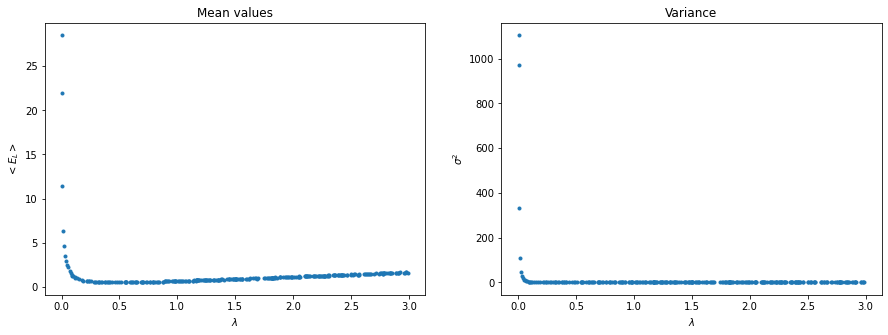

In [82]:
Ls = np.random.uniform(0, 3, 300)
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
E = vector_E_L_exp(Ls)
#E = Ls
plt.plot(Ls, E, '.')
ax1.title.set_text('Mean values')
plt.xlabel('$\lambda$')
plt.ylabel('$<E_L>$')

ax2 = plt.subplot(1, 2, 2)
var = vector_E_L_var(Ls)
#var = Ls
plt.plot(Ls, var, '.')
ax2.title.set_text('Variance')
plt.xlabel('$\lambda$')
plt.ylabel('$\sigma^2$')

plt.show()

In [86]:
E_0 = np.min(E)
l_0 = Ls[np.argmin(E)]

print('the ground state Energy is: ', E_0)
print('\nand its corresponding lambda is: ', l_0)

the ground state Energy is:  0.4990946376099031

and its corresponding lambda is:  0.46295691697519525


## (d)

What's the sinificance of $\sigma^2$? Explain in a few lines in Farsi or English.

# Importance sampling

A frequently used method is Importance Sampling. In this method, a proxy distribution is introduced to sample random numbers from any distribution. In most cases, we choose a well-known distribution such as Gaussian distribution, uniform distribution as a proxy distribution. The main concept of this method can be simply written in the following form, where q(x) is a proxy distribution.


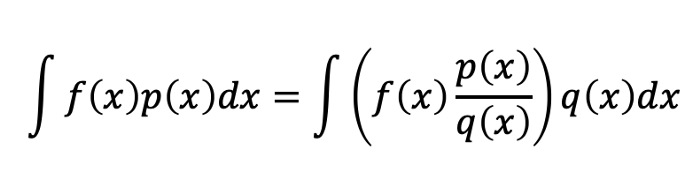

With Importance Sampling, instead of generating random numbers from p(x), we choose i.i.d samples ${x_i} (i=1,2,…,n)$ from a proxy distribution q(x) and approximate the integration value with the following calculation. Here, p(x)/q(x) is called importance of the sampling.

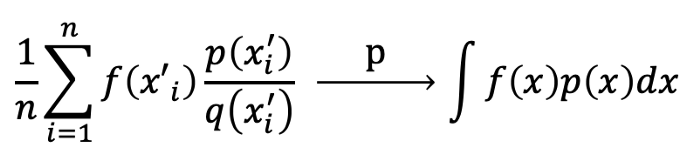

Now, let’s use a Laplace distribution’ variance calculation as an example.
Consider f(x)=x² and a probability density function p(x)=1/2 Exp(-|x|). The distribution with density function like p(x) is called Laplace distribution.
If we choose a uniform distribution as a proxy distribution, the variance of the Laplace distribution can be approximately calculated by

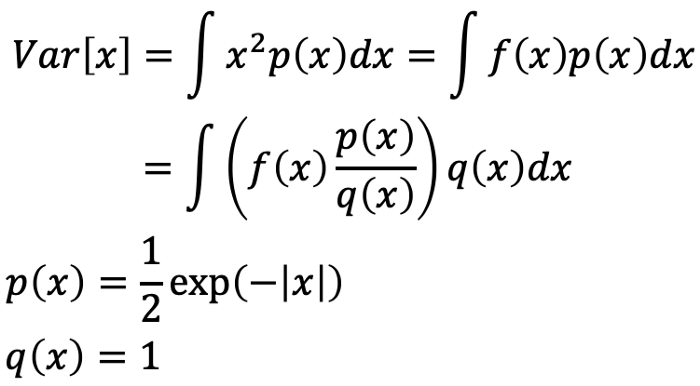

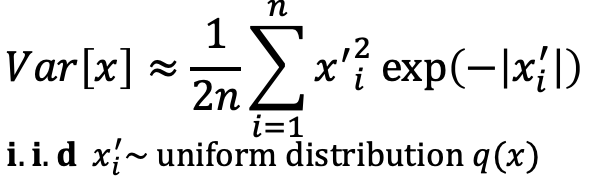

With paper and a pencil, we can easily calculate the Var[x]. The value of this calculation is 2. Now confirm the result of the Importance Sampling method.

we have:

$\int_{-\infty}^{\infty} x^2\frac{1}{2} e^{-|x|} dx = 2\int_{0}^{\infty} x^2\frac{1}{2} e^{-x} dx = \int_{0}^{\infty} x^2 d(-e^{-x}) = [-x^2e^{-x}]_{0}^{\infty} + \int_{0}^{\infty} 2xe^{-x} dx = \int_{0}^{\infty} 2xd(-e^{-x}) = [-2xe^{-x}]_{0}^{\infty} + \int_{0}^{\infty} 2e^{-x} dx = 2$

and to show this by using the Importance sampling methode we have:

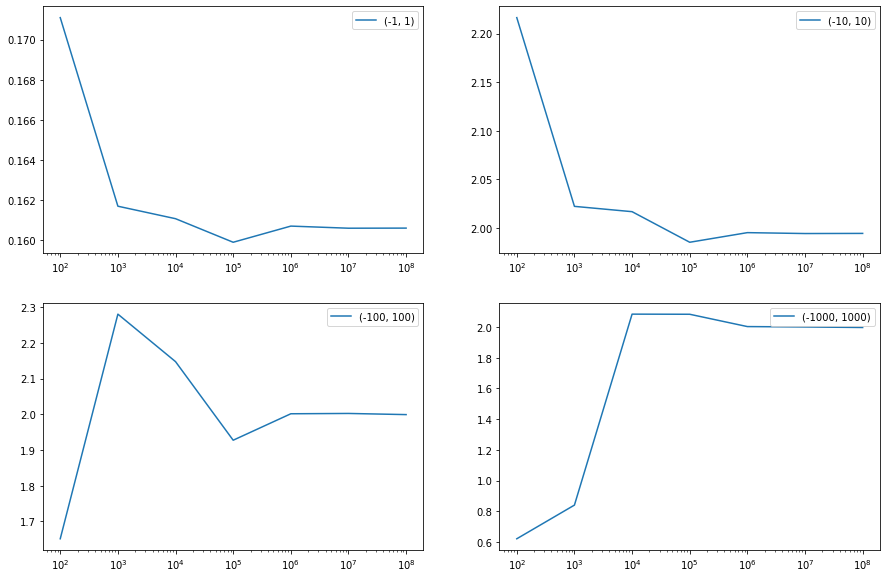

In [127]:
plt.figure(figsize=(15, 10))
Ns = [100,1000,10000,100000, 1000000, 10000000, 100000000]
for i in [0, 1, 2, 3]:
    a = -10 ** i
    b = 10 ** i
    Vars = []
    for N in Ns:
        smp = np.random.uniform(a, b, N)
        Vars.append(np.mean(smp ** 2 * np.exp(-np.abs(smp))) / 2 * (b - a))
    plt.subplot(2, 2, i + 1)
    plt.semilogx(Ns, Vars, label = '(%s, %s)' %(a, b))
    plt.legend()

as we can see its better to use a uniform distribution over at least $(-10, 10)$ since the intended integral is over the whole of real numbers but since it decreases quickly as we get away from the origin, using larger ranges does not substantially change the results as indicated above.

# Inverse Transform Sampling

In Inverse Transform Sampling method, we use a random number u generated from a 1-dimensional uniform distribution to generate a random number x of any 1-dimensional probability density function p(x). In this case, we use the inverse function of the cumulative distribution function of p(x). If the cumulative distribution function of p(x) is P(x), then the inverse function of u=P(x) is x =P^-1 (u). Now, $x = P^-1 (u)$ has p(x) as probability density function on [0,1]. Therefore, with n samples from uniform distribution on [0,1] ${u_i} (i=1,2,…,n)$, we can generate n sample of p(x) distribution ${x_i} (i=1,2,…,n)$ by calculate $x_i = P^{-1}(u_i)$.

Again, let's consider the Laplace distribution’s variance calculation as an example. This time we directly generate random numbers (samples) from the Laplace distribution’s probability density function using the Inverse Transform Sampling method. With these random numbers, we will again recalculate the approximated value of Var[x].

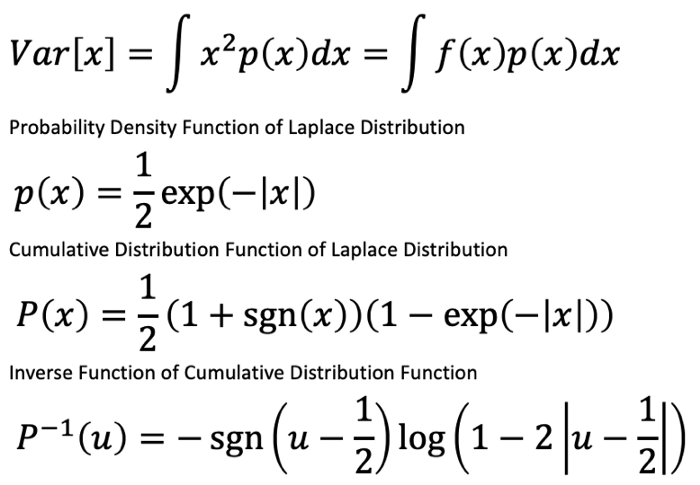

Now check the result of this method.

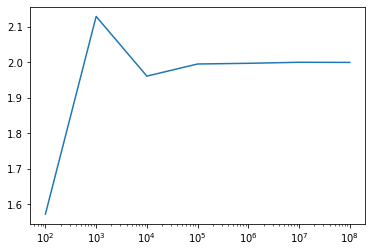

In [7]:
Ns = [100,1000,10000,100000, 1000000, 10000000, 100000000]
Vars = []
for N in Ns:
    u = np.random.uniform(0, 1, N)
    sample = - np.sign(u - 1 / 2) * np.log(1 - 2 * np.abs(u - 1 / 2))
    Vars.append(np.mean(sample ** 2))
plt.semilogx(Ns, Vars)

# Rejection Sampling 

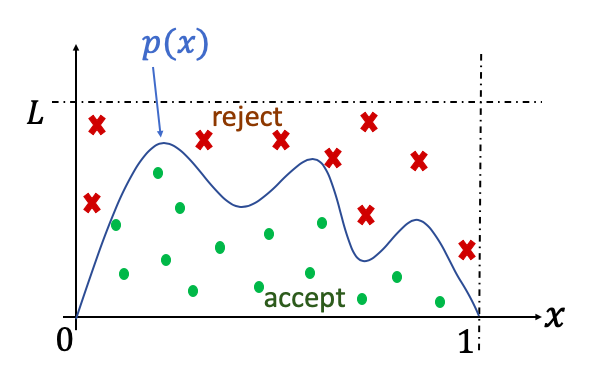

The idea in Rejection Sampling is to use a proxy distribution (Gaussian or uniform distribution, etc.) called q(x) to generate a random number and use another uniform distribution to evaluate the generated sample whether or not to accept it as a sample generated from p(x). With this method, we can also generate random numbers from a higher dimensional distribution.

As preparation in generating random numbers with this method, we need to know a finite value of L where max[p(x)/q(x)] < L. Here, q(x) is a proxy distribution.

First, we generate a random number x’ from a proxy distribution q(x). This x’ is called a proposal point.<br>
Next, generate a random number v from a uniform distribution on [0, L]. This v will be used to evaluate the proposal point, whether to be fine considering generated from p(x).<br>
If v ≤ p(x’)/q(x’), then x’ is accepted as a random number generated by p(x), else, x’ is rejected.
The algorithm in generating n random numbers with Rejection Sampling is

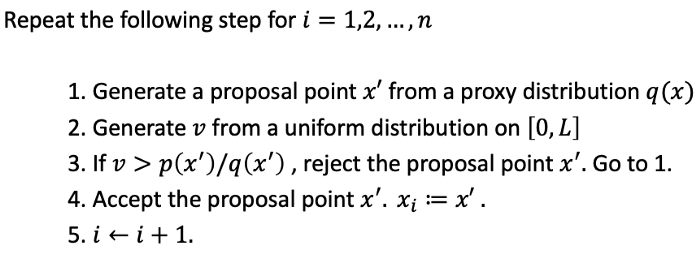

Now use rejection sampling method to evaluate the variance of Laplace Distribution.

In [20]:
#code here
def Laplace(x):
    return np.exp(-np.abs(x)) / 2

def Rejection(n, pdf, half_width):
    sample = []
    count = 0
    while count < n:
        proposal = np.random.uniform(-half_width, half_width)
        #thus L = half_width
        v = np.random.uniform(0, half_width)
        if v <= 2 * half_width * pdf(proposal):
            sample.append(proposal)
            count += 1
    return np.array(sample)

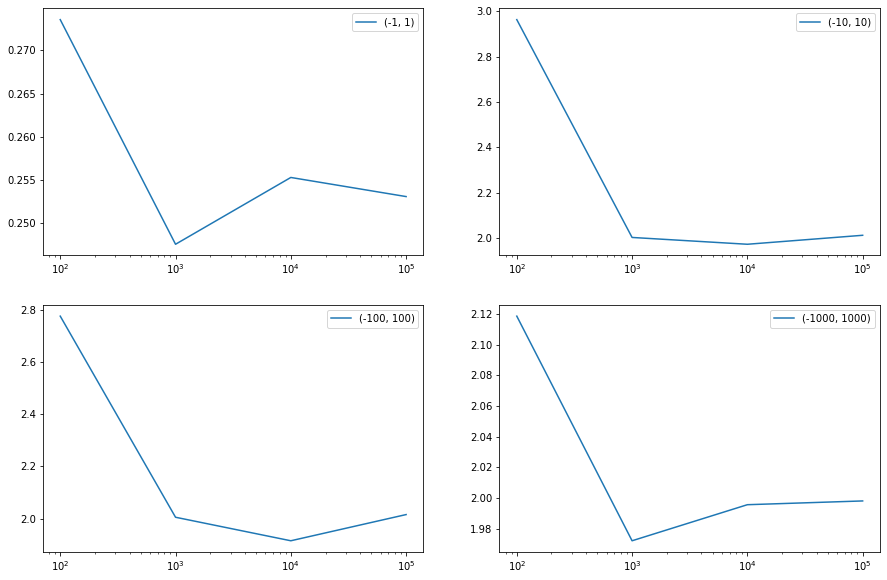

In [24]:
plt.figure(figsize=(15, 10))
Ns = [100,1000,10000,100000]
for i in [0, 1, 2, 3]:
    hw = 10 ** i
    Vars = []
    for N in Ns:
        smp = Rejection(N, Laplace, hw)
        Vars.append(np.mean(smp ** 2))
    plt.subplot(2, 2, i + 1)
    plt.semilogx(Ns, Vars, label = '(%s, %s)' %(-hw, hw))
    plt.legend()

# Markov Chain Monte carlo method(MCMC)

In the Rejection sampling method, it is impossible to generate random numbers when the upper boundary L is not known. MCMC method is an effective solution to this problem. MCMC method uses the concept of a stochastic process (Markov chain in this case). In this case, the generation of i-th sample $x_i$ depends on the previous sample $x_{i-1}$. ${x_1, x_2, …,x_n}$ with this concept is called a Markov chain. Here, I introduce one of the MCMC methods, the Metropolis-Hastings method.<br>

The process in this method is similar to Rejection sampling. But here, a proxy distribution density function is represented by a conditional probability $q(x|x_i)$, and the evaluation index v is generated from a uniform distribution on [0,1].<br>

First, we generate a random number x’ from a proxy distribution $q(x|x_i)$. This x’ is called a proposal point.<br>
Next, generate a random number v from a uniform distribution on [0, 1]. This v will be used to evaluate the proposal point, whether to be fine considering generated from p(x).<br>
If $v ≤ p(x’)q(x_i|x’)/(p(x_i)q(x’|x_i))$, then x’ is accepted as a random number generated by p(x), else, x’ is rejected.<br>
The algorithm in generating n random numbers with Rejection Sampling is

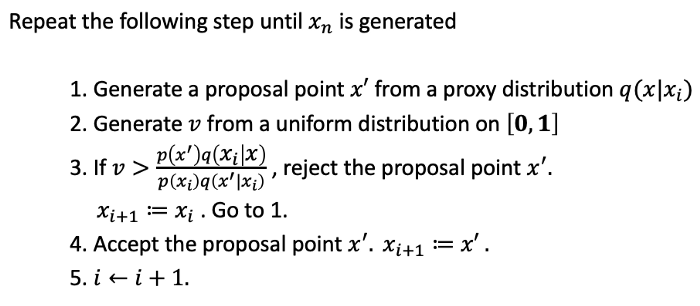

Now use MCMC to calculate the variance of Laplace Distribution.

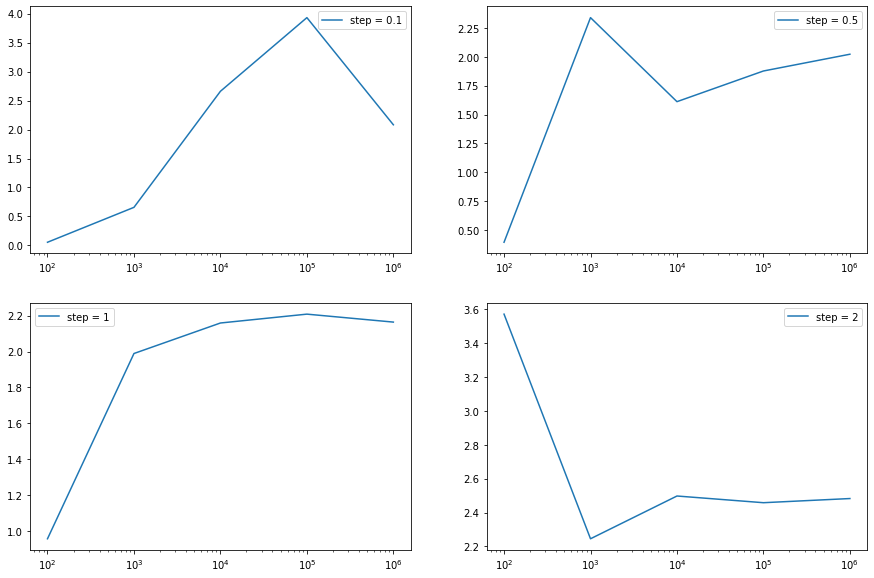

In [35]:
#code here

plt.figure(figsize=(15, 10))
Ns = [100,1000,10000,100000, 1000000]
i = 1
for step in [0.1, 0.5, 1, 2]:
    Vars = []
    for N in Ns:
        smp = Metropolice(N, Laplace, step)
        Vars.append(np.mean(smp ** 2))
    plt.subplot(2, 2, i)
    plt.semilogx(Ns, Vars, label = 'step = %s' %step)
    plt.legend()
    i += 1